In [1]:
import numpy as np
import matplotlib.pyplot as plt; plt.rc('font', size=14)
import pandas as pd
from collections import Counter
import seaborn as sns

cmap = sns.color_palette("rocket_r", as_cmap=True)

In [2]:
taxa = ['B_cellulosilyticus_WH2', 
        'B_caccae', 
        'B_vulgatus', 
        'B_thetaiotaomicron', 
        'B_ovatus', 
        'R_obeum', 
        'B_uniformis', 
        'P_distasonis', 
        'C_scindens', 
        'C_aerofaciens', 
        'C_spiroforme', 
        # 'D_longicatena'
        ]

cols = ['#016bff',
        '#b91f1c',
        '#308937',
        '#ff8137',
        '#6f4fc7',
        '#d4b300',
        '#893a2b',
        '#ff6c79',
        '#16c4ff',
        '#766f41',
        '#00c800',
        '#af3261']

# pretty_names_dir = {'B_caccae': '$B. caccae$',
#                 'B_cellulosilyticus_WH2': '$B. cellulosilyticus$',
#                 'B_ovatus': '$B. ovatus$',
#                 'B_thetaiotaomicron': '$B. thetaiotaomicron$',
#                 'B_uniformis': '$B. uniformis$',
#                 'B_vulgatus': '$B. vulgatus$',
#                 'C_aerofaciens': '$C. aerofaciens$',
#                 'C_scindens': '$C. scindens$',
#                 'C_spiroforme': '$C. spiroforme$',
#                 # 'D_longicatena': '$D. longicatena$',
#                 'P_distasonis': '$P. distasonis$',
#                 'R_obeum': '$R. obeum$'}

pretty_names_dir = {'B_caccae': 'Bca',
                'B_cellulosilyticus_WH2': 'Bce',
                'B_ovatus': 'Bov',
                'B_thetaiotaomicron': 'Bth',
                'B_uniformis': 'Bun',
                'B_vulgatus': 'Bvu',
                'C_aerofaciens': 'Cae',
                'C_scindens': 'Csc',
                'C_spiroforme': 'Csp',
                # 'D_longicatena': 'Dlo',
                'P_distasonis': 'Pdi',
                'R_obeum': 'Rob'
                }

cols_species_map = dict(zip(taxa, cols))

In [3]:
def presence_absence(x):
    if pd.isna(x):
        return 0
    else:
        return 1
    
def drop_nan(x):
    if pd.isna(x):
        return False
    else:
        return True

# KOs exctraction

In [4]:
KOs = []
for taxon in taxa:
    ko = pd.read_table(f'eggNOG/{taxon}_eggNOG.tsv', index_col=0, skiprows=4, skipfooter=3, engine='python')
    ko = ko[ko['KEGG_ko'] != '-'].copy()
    ko = ko.loc[:,['KEGG_ko']].copy()
    ko = ko['KEGG_ko'].str.split(',', expand=True)
    ko.reset_index(inplace=True)
    ko = ko.melt(id_vars='#query', value_name='KEGG_ko')
    ko.drop(columns=['#query', 'variable'], inplace=True)
    ko.dropna(inplace=True)
    ko.drop_duplicates(subset=['KEGG_ko'], inplace=True)
    ko.sort_values(by='KEGG_ko', inplace=True, ignore_index=True)
    ko['KEGG_ko'] = ko['KEGG_ko'].apply(lambda x: x.replace('ko:', ''))
    ko.columns = [taxon]
    KOs.append(ko)
KOs = pd.concat(KOs, axis=1)
KOs.to_csv('KOs.tsv', sep='\t', index=False, header=True)
KOs

,B_cellulosilyticus_WH2,B_caccae,B_vulgatus,B_thetaiotaomicron,B_ovatus,R_obeum,B_uniformis,P_distasonis,C_scindens,C_aerofaciens,C_spiroforme
0,K00009,K00009,K00001,K00009,K00009,K00002,K00009,K00008,K00001,K00001,K00057
1,K00012,K00012,K00009,K00012,K00012,K00003,K00012,K00012,K00003,K00003,K00088
2,K00013,K00013,K00012,K00013,K00013,K00005,K00013,K00013,K00004,K00005,K00128
3,K00014,K00014,K00013,K00014,K00014,K00008,K00014,K00014,K00008,K00010,K00134
4,K00018,K00018,K00014,K00018,K00018,K00012,K00018,K00015,K00013,K00012,K00147
...,...,...,...,...,...,...,...,...,...,...,...
1338,K21750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,K22130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,K22132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,K22278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RevEcoR

In [5]:
complementarity = pd.read_table('RevEcoR/complementarity_index.tab', index_col=0)
complementarity.columns = complementarity.columns.map(pretty_names_dir)
complementarity.index = complementarity.index.map(pretty_names_dir)
complementarity

,Bce,Bca,Bvu,Bth,Bov,Rob,Bun,Pdi,Csc,Cae,Csp
Bce,0.000000,0.000000,0.000000,0.021739,0.000000,0.043478,0.021739,0.021739,0.043478,0.043478,0.000000
Bca,0.033333,0.000000,0.016667,0.033333,0.000000,0.066667,0.033333,0.016667,0.033333,0.066667,0.000000
Bvu,0.047619,0.015873,0.000000,0.047619,0.015873,0.079365,0.015873,0.031746,0.047619,0.079365,0.000000
Bth,0.000000,0.000000,0.000000,0.000000,0.000000,0.053571,0.000000,0.017857,0.035714,0.053571,0.000000
Bov,0.038462,0.000000,0.019231,0.038462,0.000000,0.057692,0.038462,0.019231,0.038462,0.057692,0.000000
Rob,0.122449,0.122449,0.122449,0.142857,0.122449,0.000000,0.102041,0.102041,0.081633,0.040816,0.020408
Bun,0.103448,0.051724,0.051724,0.086207,0.086207,0.068966,0.000000,0.068966,0.051724,0.068966,0.000000
Pdi,0.057692,0.019231,0.076923,0.057692,0.038462,0.038462,0.076923,0.000000,0.038462,0.038462,0.000000
Csc,0.179487,0.153846,0.179487,0.153846,0.153846,0.102564,0.128205,0.205128,0.000000,0.025641,0.051282
Cae,0.200000,0.177778,0.200000,0.177778,0.177778,0.111111,0.155556,0.200000,0.088889,0.000000,0.044444


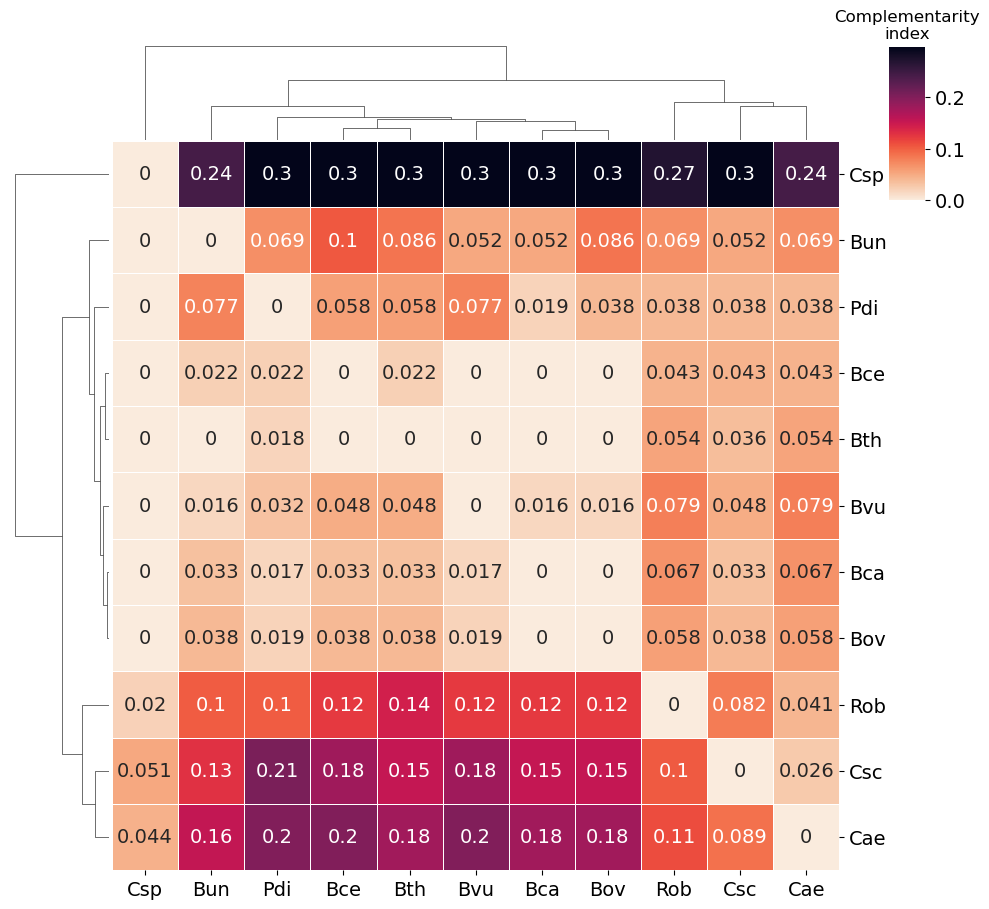

In [6]:
ax = sns.clustermap(complementarity, 
    cmap=cmap,
    dendrogram_ratio=(0.12, 0.12), 
    annot=True, 
    cbar_pos=(1, 0.8, 0.04, 0.17), 
    figsize=(9, 9), 
    linewidths=0.5)
cax = ax.ax_heatmap
cax.set_xticklabels(cax.get_xticklabels(), rotation=0, ha='center')
cax.set_yticklabels(cax.get_yticklabels(), rotation=0, ha='left')
plt.title('Complementarity\nindex', fontsize=12)
plt.savefig('RevEcoR/complementarity.svg', bbox_inches='tight')
plt.show()

In [7]:
competition = pd.read_table('RevEcoR/competition_index.tab', index_col=0)
competition.columns = competition.columns.map(pretty_names_dir)
competition.index = competition.index.map(pretty_names_dir)
competition

,Bce,Bca,Bvu,Bth,Bov,Rob,Bun,Pdi,Csc,Cae,Csp
Bce,1.000000,0.934783,0.978261,0.934783,0.956522,0.565217,0.978261,0.934783,0.434783,0.326087,0.347826
Bca,0.716667,1.000000,0.933333,0.900000,0.850000,0.583333,0.816667,0.750000,0.366667,0.400000,0.416667
Bvu,0.714286,0.888889,1.000000,0.873016,0.761905,0.555556,0.777778,0.714286,0.428571,0.444444,0.396825
Bth,0.767857,0.964286,0.982143,1.000000,0.821429,0.607143,0.839286,0.750000,0.375000,0.410714,0.446429
Bov,0.846154,0.980769,0.923077,0.884615,1.000000,0.538462,0.961538,0.846154,0.423077,0.326923,0.326923
Rob,0.530612,0.714286,0.714286,0.693878,0.571429,1.000000,0.591837,0.551020,0.428571,0.612245,0.489796
Bun,0.775862,0.844828,0.844828,0.810345,0.862069,0.500000,1.000000,0.775862,0.431034,0.327586,0.327586
Pdi,0.826923,0.865385,0.865385,0.807692,0.846154,0.519231,0.865385,1.000000,0.403846,0.307692,0.307692
Csc,0.512821,0.564103,0.692308,0.538462,0.564103,0.538462,0.641026,0.538462,1.000000,0.564103,0.307692
Cae,0.333333,0.533333,0.622222,0.511111,0.377778,0.666667,0.422222,0.355556,0.488889,1.000000,0.422222


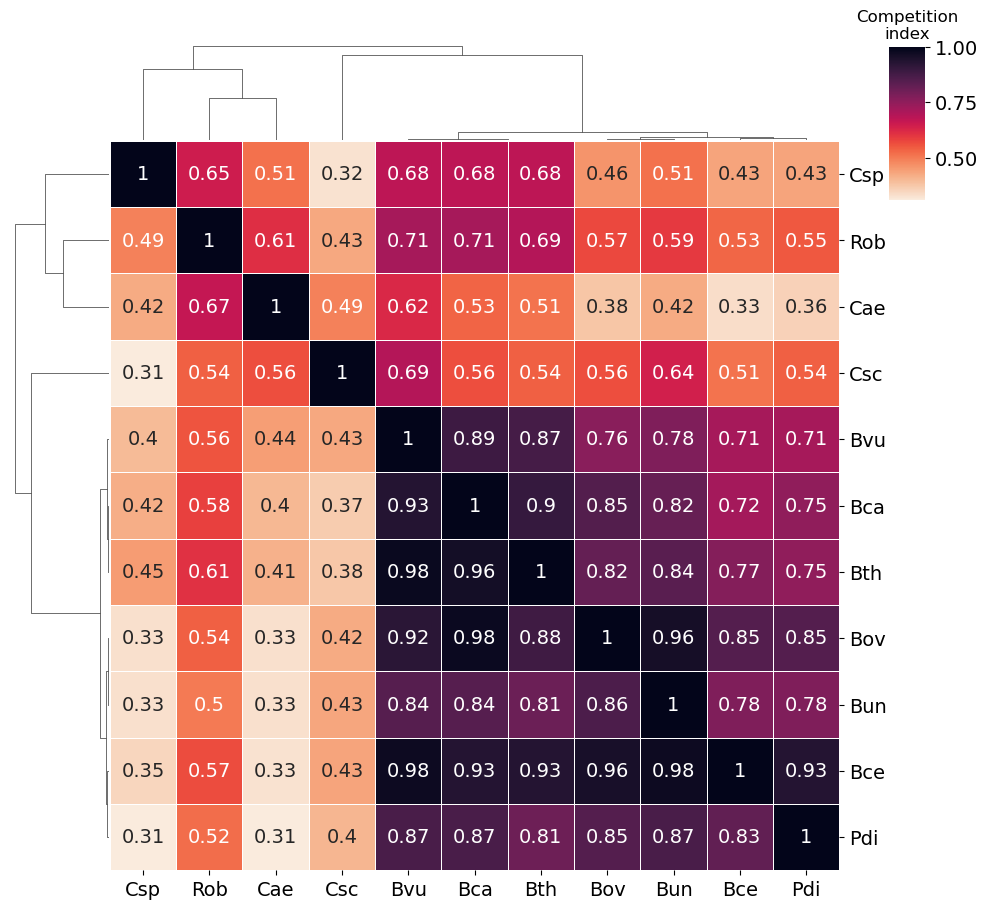

In [8]:
ax = sns.clustermap(competition, 
    metric='cosine',
    cmap=cmap,
    dendrogram_ratio=(0.12, 0.12), 
    annot=True, 
    cbar_pos=(1, 0.8, 0.04, 0.17), 
    figsize=(9, 9), 
    linewidths=0.5)
cax = ax.ax_heatmap
cax.set_xticklabels(cax.get_xticklabels(), rotation=0, ha='center')
cax.set_yticklabels(cax.get_yticklabels(), rotation=0, ha='left')
plt.title('Competition\nindex', fontsize=12)
plt.savefig('RevEcoR/competition.svg', bbox_inches='tight')
plt.show()